In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
import datetime as dt


In [2]:
weatherfootdata = pd.read_csv("./data_files/FootTrafficWeather_July2022_Melbourne.csv")

In [ ]:
weatherfootdata

,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp
0,2022-07-01,435062,0.0,N,12.5,Y,5.9,Y,5.4
1,2022-07-02,501883,0.0,N,12.5,Y,7.0,Y,6.8
2,2022-07-03,386038,0.0,N,13.2,Y,3.7,Y,8.8
3,2022-07-04,356396,0.0,N,13.3,Y,4.6,Y,9.5
4,2022-07-05,370637,0.0,N,15.0,Y,7.5,Y,9.3
5,2022-07-06,423220,0.0,N,17.6,Y,3.1,Y,9.6
6,2022-07-07,390030,0.4,N,13.9,Y,4.9,Y,8.4
7,2022-07-08,379723,2.4,N,11.9,Y,8.2,Y,5.4
8,2022-07-09,458521,5.8,N,12.9,Y,7.6,Y,7.0
9,2022-07-10,372983,0.6,N,15.9,Y,3.8,Y,8.4


In [ ]:
plt.figure(figsize=(20,10))
i=1
for col in df.columns:
    if col != 'id' and col != 'heart_disease' and col != 'stroke' and col != 'hypertension' and col != 'avg_glucose_level':
        if df[col].dtypes == np.int64 or df[col].dtypes == np.float64 and col != 'stroke':
            plt.subplot(2,4,i)
            sns.boxplot(x='stroke' , y =col, data = df, palette="Purples")
            i = i+1
            plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

In [3]:
y = weatherfootdata['total_people']
x = weatherfootdata[['date', 'total_rain', 'rain_quality', 'max_temp',
       'max_temp_quality', 'min_temp', 'min_temp_quality', 'solar_exp']]

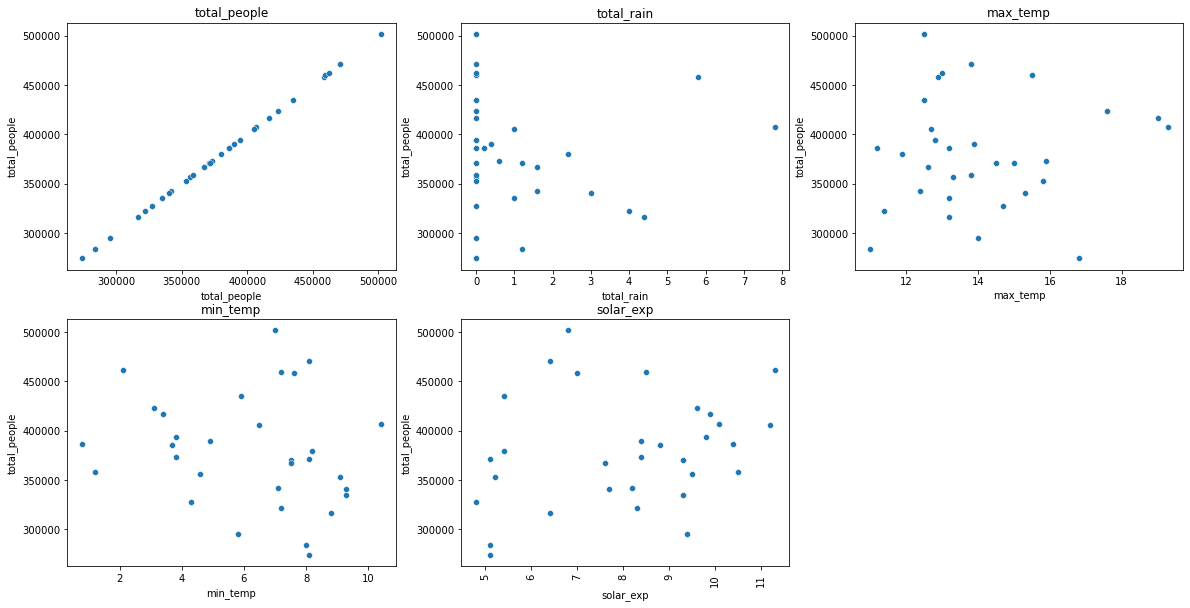

In [16]:
plt.figure(figsize=(20,10))
i=1
for col in weatherfootdata.columns:
    if col != 'date':
        if weatherfootdata[col].dtypes == np.int64 or weatherfootdata[col].dtypes == np.float64 and col != 'total_people':
            plt.subplot(2,3,i)
            sns.scatterplot(x=col , y = 'total_people', data = weatherfootdata, palette="Purples")
            i = i+1
            plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

In [3]:

le = preprocessing.LabelEncoder()
weatherfootdata['rain_quality']=le.fit_transform(weatherfootdata['rain_quality'])
weatherfootdata['max_temp_quality']=le.fit_transform(weatherfootdata['max_temp_quality'])
weatherfootdata['min_temp_quality']=le.fit_transform(weatherfootdata['min_temp_quality'])

In [4]:
weatherfootdata['date'] = pd.to_datetime(weatherfootdata['date'])
weatherfootdata['date']=weatherfootdata['date'].map(dt.datetime.toordinal)

In [6]:
weatherfootdata

,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp
0,738337,435062,0.0,0,12.5,0,5.9,0,5.4
1,738338,501883,0.0,0,12.5,0,7.0,0,6.8
2,738339,386038,0.0,0,13.2,0,3.7,0,8.8
3,738340,356396,0.0,0,13.3,0,4.6,0,9.5
4,738341,370637,0.0,0,15.0,0,7.5,0,9.3
5,738342,423220,0.0,0,17.6,0,3.1,0,9.6
6,738343,390030,0.4,0,13.9,0,4.9,0,8.4
7,738344,379723,2.4,0,11.9,0,8.2,0,5.4
8,738345,458521,5.8,0,12.9,0,7.6,0,7.0
9,738346,372983,0.6,0,15.9,0,3.8,0,8.4


In [5]:
y = weatherfootdata['total_people']
x = weatherfootdata[['date','total_rain', 'rain_quality', 'max_temp',
       'max_temp_quality', 'min_temp', 'min_temp_quality', 'solar_exp']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

In [ ]:
# Linear Regression

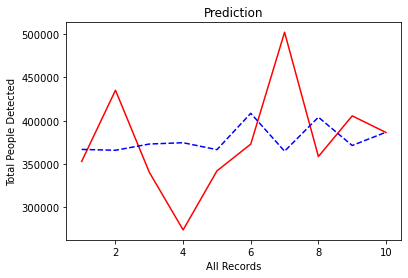

In [11]:
lr = LinearRegression()
lr.fit(X_train,y_train)
# Predicting the Salary for the Test values
y_pred = lr.predict(X_test)
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='--') 
plt.title('Prediction')
plt.xlabel('All Records')
plt.ylabel('Total People Detected')
plt.show()

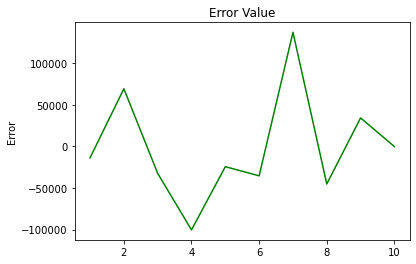

In [17]:
error_values = [i for i in range(1,len(y_test)+1,1)]
error_margin = y_test - y_pred
plt.plot(error_values, error_margin, color='green', linestyle='-')
plt.title('Error Value')
plt.ylabel('Error')
plt.show()

In [22]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE",mean_absolute_error(y_test,y_pred))

RMSE 11.05471806535221
MAE 49278.41263700723


In [33]:
# Lasso Regression

In [31]:
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train, y_train)
y_pred = lassoReg.predict(X_test)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE",mean_absolute_error(y_test,y_pred))

RMSE 11.05471788478278
MAE 49278.39602873921


In [ ]:
# Support Vector Regression

In [7]:
svrReg = SVR().fit(X_train, y_train)
y_pred = svrReg.predict(X_test)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE",mean_absolute_error(y_test,y_pred))

RMSE 10.973475576945328
MAE 44677.89999999977


In [7]:
np.logspace(-2, 2, 4)

array([1.00000000e-02, 2.15443469e-01, 4.64158883e+00, 1.00000000e+02])

In [9]:
svr = SVR()
param_grid = {'C': [1, 5, 10] ,
              'gamma': ['auto'], #scaled
              'kernel': ['linear','poly', 'rbf']}


search = RandomizedSearchCV(svr, param_grid, cv = 3, n_jobs = -1, verbose = 1)

search.fit(X_train,y_train)

c:\Users\loong\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [37]:

grid_svc = grid.predict(X_test)

print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,grid_svc))))
print("MAE",mean_absolute_error(y_test,grid_svc))

RMSE 10.980090494774172
MAE 45599.292404174805
